# Keras CNN MNIST
Разбора статьи: https://python.ivan-shamaev.ru/keras-tutorial-beginner-guide-to-deep-learning-in-python/

In [ ]:
import numpy as np
import theano as th
import keras as kr
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

from tensorflow.keras.layers import Conv2D

In [ ]:
print('numpy:' + np.__version__)
print('theano:' + th.__version__)
print('keras:' + kr.__version__)

numpy:1.19.5
theano:1.1.2
keras:2.5.0


In [ ]:
np.random.seed(123)  # for reproducibility

In [ ]:
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)


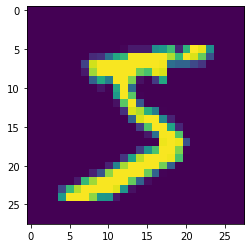

In [ ]:
plt.imshow(X_train[0])

In [ ]:
# Преобразование набора данных из формы (n, ширина, высота) в (n, глубина, ширина, высота)
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)

print(X_train.shape)

(60000, 1, 28, 28)


In [ ]:
# Преобразование типа данных в float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Нормализация значений данных в диапазоне [0, 1]
X_train /= 255
X_test /= 255

In [ ]:
print(y_train.shape)

(60000,)


In [ ]:
print(y_train[:10])

[5 0 4 1 9 2 1 3 1 4]


In [ ]:
# Преобразование одномерных массивов классов в 10-мерные матрицы классов
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [ ]:
# Вывод после преобразования
print(Y_train[:10], '\n')
print(Y_train.shape)

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]] 

(60000, 10)


In [ ]:
model = Sequential()
model.add(Conv2D(32,(3, 3), activation = 'relu', input_shape=(1,28,28), data_format='channels_first'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [ ]:
print(model.output_shape)

AttributeError: ignored

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10


InvalidArgumentError: ignored

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
score